In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline


In [2]:
df=pd.read_csv('C:/Users/GAURI/Downloads/credit_scoring_eng(in).csv')
df.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.6395,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.0141,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.9523,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.5503,supplementary education
4,0,340266.072000,53,secondary education,1,civil partnership,1,F,retiree,0,158616.0779,to have a wedding


In [3]:
df.shape

(21525, 12)

In [4]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949900,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423626,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400500,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [7]:
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [9]:
# Group by debt status (0 = no debt, 1 = has debt) and get average income
df.groupby('debt')['total_income'].mean().sort_values(ascending=False)


debt
0    167804.131650
1    163100.897061
Name: total_income, dtype: float64

In [10]:
df.groupby('income_type')['total_income'].mean().sort_values(ascending=False)


income_type
entrepreneur                   499163.144900
partner                        202417.461461
civil servant                  170898.309922
employee                       161380.260488
retiree                        137127.465690
unempoyed                      131339.751690
student                         98201.625310
paternity / maternity leave     53829.130730
Name: total_income, dtype: float64

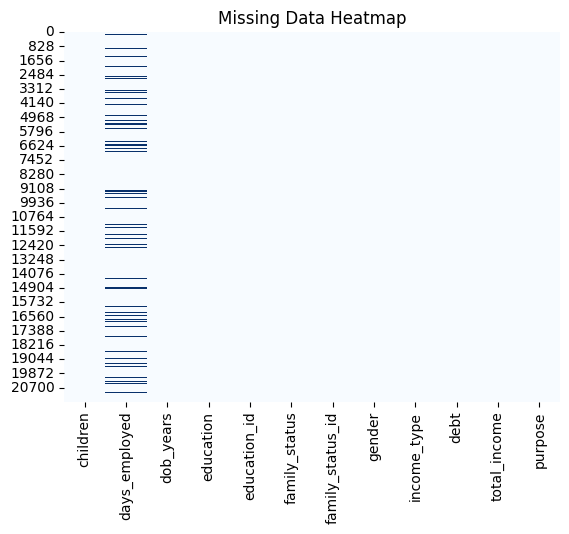

In [11]:
# Check for nulls
df.isnull().sum()

# Fill missing total_income with median
df['total_income'] = df['total_income'].fillna(df['total_income'].median())

# Optionally drop rows with too many missing values
df = df.dropna(thresh=4)

# Optional heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='Blues')
plt.title("Missing Data Heatmap")
plt.show()


In [12]:
# Avg income by debt status
print(df.groupby('debt')['total_income'].mean().sort_values(ascending=False))

debt
0    165496.027471
1    161335.185904
Name: total_income, dtype: float64


In [13]:
# Avg income by income type
print(df.groupby('income_type')['total_income'].mean().sort_values(ascending=False))

income_type
entrepreneur                   322090.541200
partner                        196683.153069
civil servant                  168290.760405
employee                       159754.181982
retiree                        137972.581058
unempoyed                      131339.751690
student                         98201.625310
paternity / maternity leave     53829.130730
Name: total_income, dtype: float64


In [14]:
# Avg total income by education level
print(df.groupby('education')['total_income'].mean().sort_values(ascending=False))

education
Masters Degree         208652.909748
masters degree         200580.771322
ACADEMIC DEGREE        198570.757300
MASTERS DEGREE         195309.492204
academic degree        187794.420500
bachelor degree        180031.425924
BACHELOR DEGREE        168898.290843
Bachelor Degree        157077.874670
PRIMARY EDUCATION      153070.008084
secondary education    152948.570256
Secondary Education    152900.281468
SECONDARY EDUCATION    150778.491573
primary education      132960.625876
Primary Education      113041.275797
Academic Degree         98752.495440
Name: total_income, dtype: float64


In [15]:
df.iloc[:5]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.6395,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.0141,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.9523,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.5503,supplementary education
4,0,340266.072000,53,secondary education,1,civil partnership,1,F,retiree,0,158616.0779,to have a wedding


In [16]:
df.loc[(df['gender'] == 'F') & (df['total_income'] > 150000) & (df['debt'] == 1)]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
14,0,-1844.956182,56,masters degree,0,civil partnership,1,F,partner,1,165127.9118,buy residential real estate
100,0,-605.026441,49,SECONDARY EDUCATION,1,widow / widower,2,F,employee,1,176384.8825,real estate transactions
124,0,-1080.514782,38,secondary education,1,married,0,F,employee,1,175046.4225,transactions with the residential real estate
164,2,-2357.523214,27,masters degree,0,married,0,F,employee,1,369587.0877,buying my own car
218,1,-2924.598386,34,secondary education,1,married,0,F,employee,1,213214.0925,buying my own car
...,...,...,...,...,...,...,...,...,...,...,...,...
21381,0,367527.086000,59,masters degree,0,married,0,F,retiree,1,200883.5726,transactions with the residential real estate
21409,2,-2082.605427,28,secondary education,1,married,0,F,employee,1,241999.6186,purchase of the house for my family
21424,0,335228.897100,55,secondary education,1,divorced,3,F,retiree,1,237992.5435,purchase of the house for my family
21430,0,-170.306697,41,secondary education,1,married,0,F,employee,1,350897.9540,purchase of a car


In [17]:
# Crosstab: Gender vs Debt
pd.crosstab(df['gender'], df['debt'], normalize='index')

debt,0,1
gender,,
F,0.930177,0.069823
M,0.897503,0.102497
XNA,1.000000,0.000000


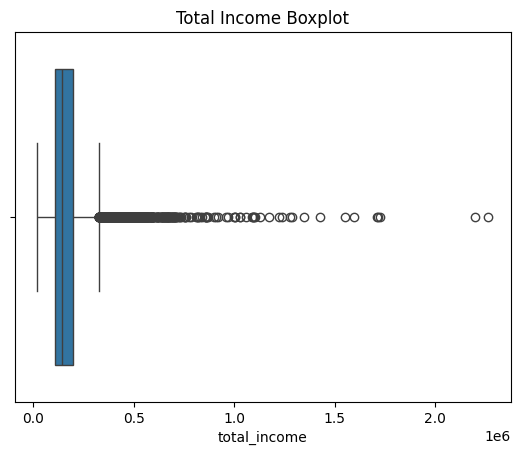

In [18]:
#outlier detection
sns.boxplot(x=df['total_income'])
plt.title("Total Income Boxplot")
plt.show()

In [19]:
z_income = np.abs(stats.zscore(df['total_income']))
df_z_removed = df[z_income < 3]

print("Original shape:", df.shape)
print("After removing outliers from total_income:", df_z_removed.shape)


Original shape: (21525, 12)
After removing outliers from total_income: (21214, 12)


In [20]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

df_iqr = df.copy()
for col in ['total_income', 'days_employed', 'dob_years']:
    df_iqr = remove_outliers_iqr(df_iqr, col)

print("After IQR-based outlier removal:", df_iqr.shape)


After IQR-based outlier removal: (13832, 12)


In [21]:
# Convert 'gender', 'income_type', 'education', 'family_status', 'purpose' to dummy vars
df_encoded = pd.get_dummies(df_iqr, columns=['gender', 'income_type', 'education', 'family_status', 'purpose'], drop_first=True)
df_encoded.head()


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income,gender_M,gender_XNA,income_type_employee,...,purpose_supplementary education,purpose_to become educated,purpose_to buy a car,purpose_to get asupplementary education,purpose_to have a wedding,purpose_to own a car,purpose_transactions with my real estate,purpose_transactions with the residential real estate,purpose_university education,purpose_wedding ceremony
1,1,-4024.803754,36,1,0,0,112080.0141,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0,-5623.422610,33,1,0,0,145885.9523,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,3,-4124.747207,32,1,0,0,267628.5503,True,False,True,...,True,False,False,False,False,False,False,False,False,False
5,0,-926.185831,27,0,1,0,255763.5654,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,0,-2879.202052,43,0,0,0,240525.9719,False,False,False,...,False,False,False,False,False,False,False,False,False,False


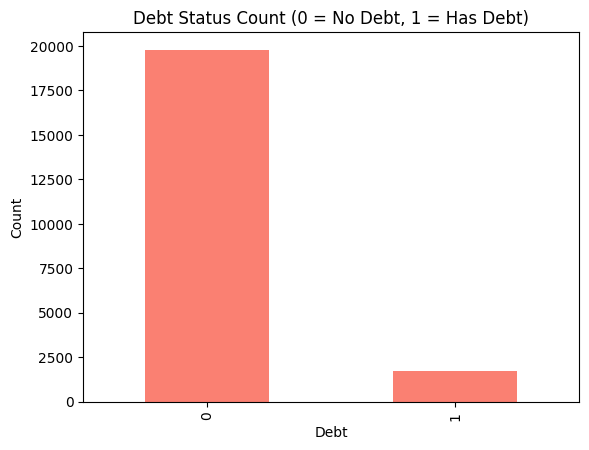

In [22]:
df['debt'].value_counts().plot(kind='bar', color='salmon')
plt.title("Debt Status Count (0 = No Debt, 1 = Has Debt)")
plt.xlabel("Debt")
plt.ylabel("Count")
plt.show()


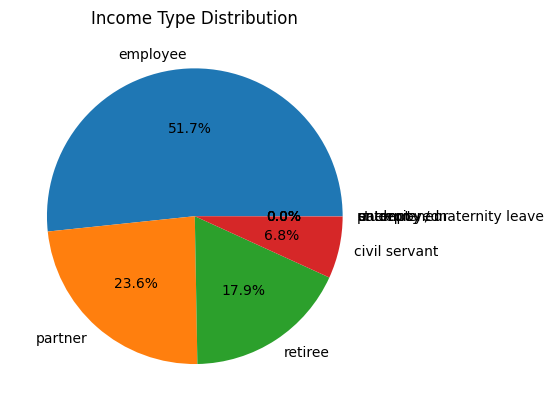

In [23]:
df['income_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Income Type Distribution")
plt.ylabel("")
plt.show()


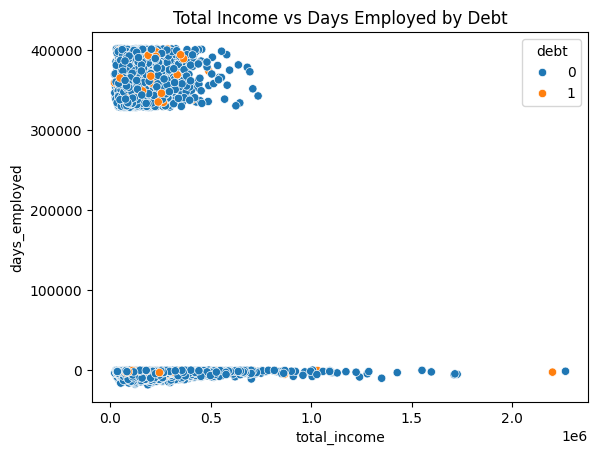

In [24]:
sns.scatterplot(data=df, x='total_income', y='days_employed', hue='debt')
plt.title("Total Income vs Days Employed by Debt")
plt.show()


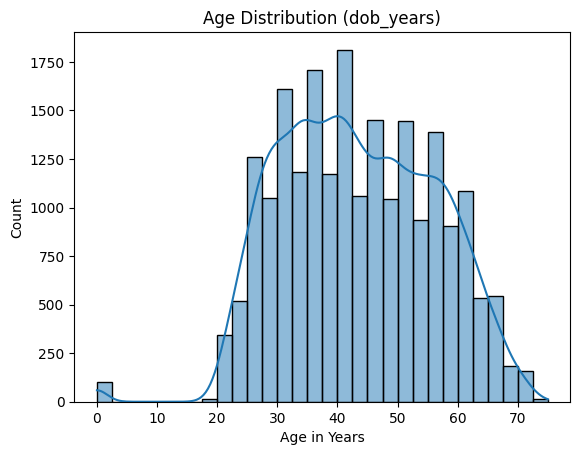

In [25]:
sns.histplot(df['dob_years'], bins=30, kde=True)
plt.title("Age Distribution (dob_years)")
plt.xlabel("Age in Years")
plt.show()


In [26]:
# Summary of numeric features
print(df.describe())

# Income binning
df['income_group'] = pd.cut(df['total_income'], bins=[0, 30000, 60000, 90000, 120000, 200000], labels=['Low', 'Mid-Low', 'Mid', 'Mid-High', 'High'])

# Crosstab income group vs debt
print(pd.crosstab(df['income_group'], df['debt'], normalize='index'))


           children  days_employed     dob_years  education_id  \
count  21525.000000   19351.000000  21525.000000  21525.000000   
mean       0.538908   63046.497661     43.293380      0.817236   
std        1.381587  140827.311974     12.574584      0.548138   
min       -1.000000  -18388.949900      0.000000      0.000000   
25%        0.000000   -2747.423626     33.000000      1.000000   
50%        0.000000   -1203.369529     42.000000      1.000000   
75%        1.000000    -291.095954     53.000000      1.000000   
max       20.000000  401755.400500     75.000000      4.000000   

       family_status_id          debt  total_income  
count      21525.000000  21525.000000  2.152500e+04  
mean           0.972544      0.080883  1.651595e+05  
std            1.420324      0.272661  9.786607e+04  
min            0.000000      0.000000  2.066726e+04  
25%            0.000000      0.000000  1.077982e+05  
50%            0.000000      0.000000  1.450179e+05  
75%            1.000000    